Food Delivery Cost and Profitability Analysis

In [61]:
import pandas as pd
food_orders=pd.read_excel(r'D:\Data Analyst\Projects\Food Startup Profit\food_orders_new_delhi1.xlsx')
print(food_orders.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924 2024-02-01 01:11:52   
1         2       C1860         R2054 2024-02-02 22:11:04   
2         3       C6390         R2870 2024-01-31 05:54:35   
3         4       C6191         R2642 2024-01-16 22:52:49   
4         5       C6734         R2799 2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

   Discounts and Offers  Commission Fee  Payment Processing Fee  \
0                  0.05             150                      47   
1                  0.10             198                     

In [62]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   float64       
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), objec

In [63]:
from datetime import datetime
food_orders['Order Date and Time']=pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time']=pd.to_datetime(food_orders['Delivery Date and Time'])

In [64]:
food_orders['Order Date and Time']

0     2024-02-01 01:11:52
1     2024-02-02 22:11:04
2     2024-01-31 05:54:35
3     2024-01-16 22:52:49
4     2024-01-29 01:19:30
              ...        
995   2024-01-14 05:57:00
996   2024-01-28 08:50:43
997   2024-01-21 09:43:19
998   2024-01-30 22:23:38
999   2024-01-08 14:46:43
Name: Order Date and Time, Length: 1000, dtype: datetime64[ns]

In [65]:


food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discounts and Offers'])
                                                   if x['Discounts and Offers'] < 1
                                                   else x['Discounts and Offers'], axis=1)

print(food_orders[['Order Value', 'Discounts and Offers','Discount Amount']].head(), food_orders.dtypes)

   Order Value  Discounts and Offers  Discount Amount
0         1914                  0.05            95.70
1          986                  0.10            98.60
2          937                  0.15           140.55
3         1463                  0.00             0.00
4         1992                  0.50           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers             float64
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Amount                  float64
dtype: object


In [66]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.84999999998, 'Total Profit': -105719.85}


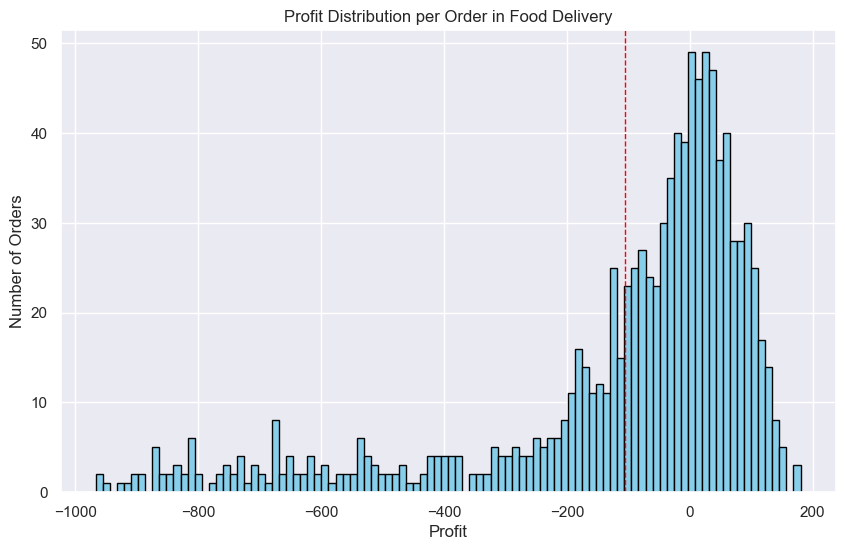

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(food_orders['Profit'],bins=100,color='skyblue',edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(),color='red',linestyle='dashed',linewidth=1)
plt.show()

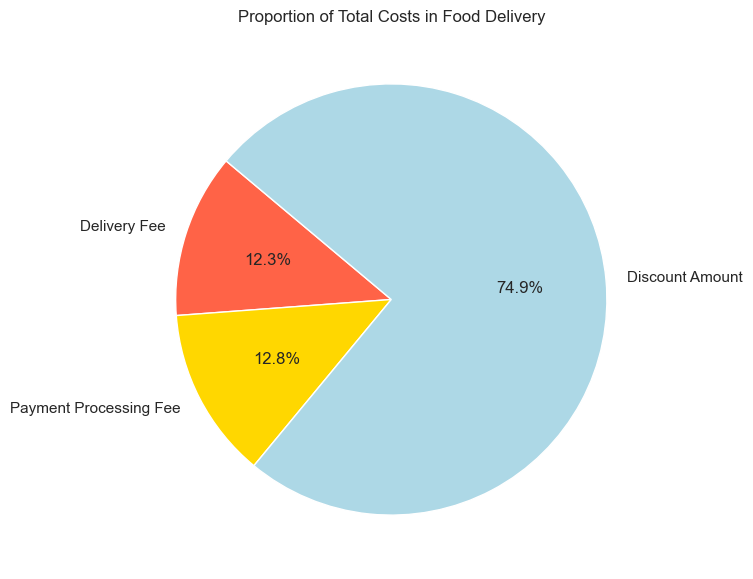

In [68]:


costs_breakdown=food_orders[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(7,7))
plt.pie(costs_breakdown,labels=costs_breakdown.index,startangle=140,autopct='%1.1f%%',colors=['tomato','gold','lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

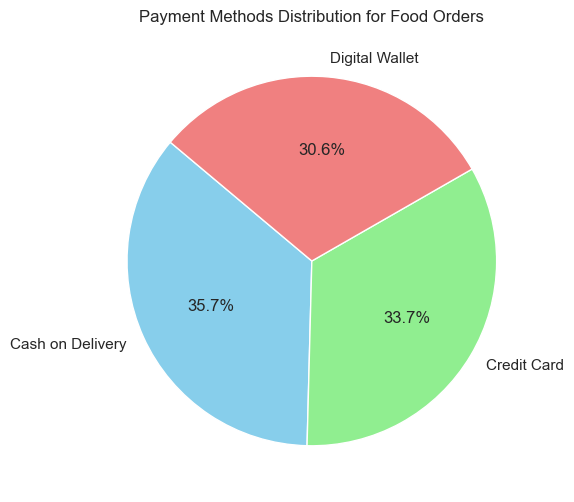

In [69]:


payment_counts = food_orders['Payment Method'].value_counts()
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='pie',autopct="%1.1f%%",startangle=140,colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Payment Methods Distribution for Food Orders')
plt.ylabel('')
plt.show()

In [70]:
total_order_value_credit_card = food_orders.loc[food_orders['Payment Method'] == 'Credit Card', 'Order Value'].sum()
print(total_order_value_credit_card)
total_order_value_cod = food_orders.loc[food_orders['Payment Method'] == 'Cash on Delivery', 'Order Value'].sum()
print(total_order_value_cod)
total_order_value_Digital_Wallet = food_orders.loc[food_orders['Payment Method'] == 'Digital Wallet' ,'Order Value'].sum()
print(total_order_value_Digital_Wallet)

361208
374669
318092


In [71]:
payment_sum=[361208,374669,318092]
Payment_meth=['total_order_value_credit_card','total_order_value_cod','total_order_value_Digital_Wallet']


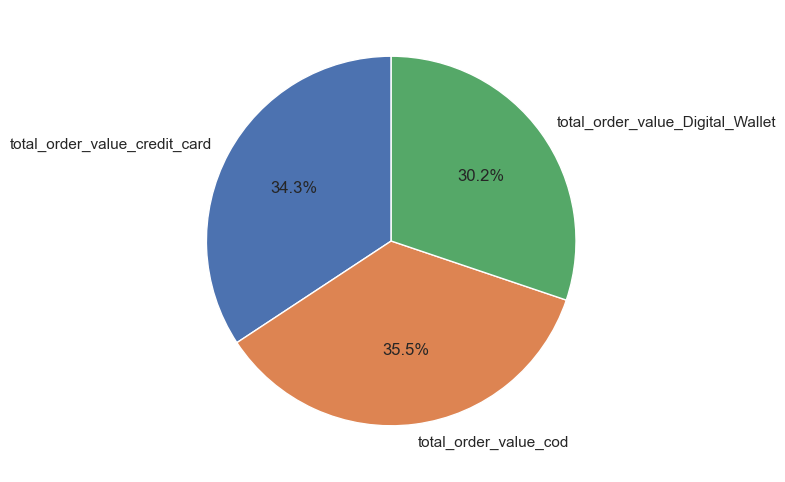

In [72]:
plt.figure(figsize=(8, 6))
plt.pie(payment_sum,labels=Payment_meth,autopct="%1.1f%%",startangle=90)
plt.show()


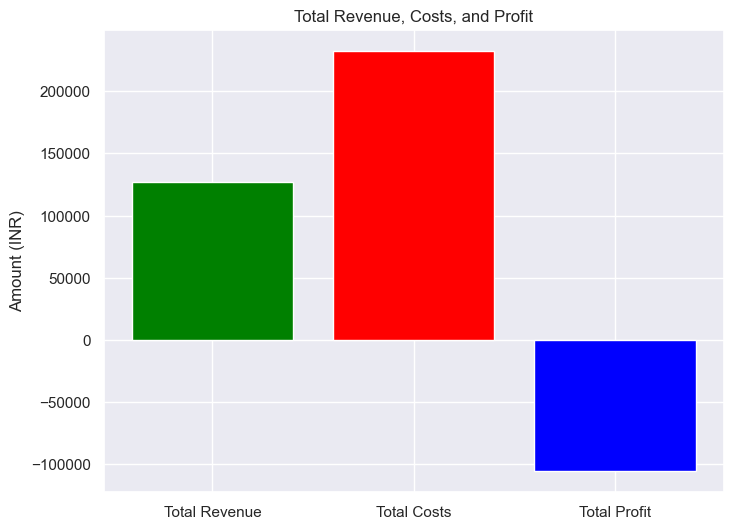

In [73]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

<Axes: xlabel='Restaurant ID', ylabel='Order Value'>

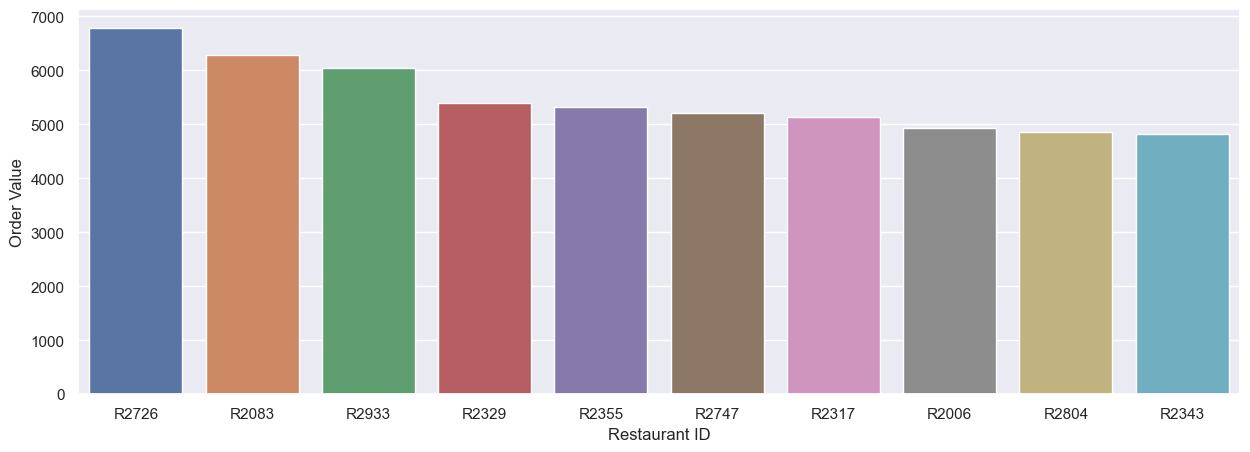

In [74]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
restaurant_sales = food_orders.groupby(['Restaurant ID'], as_index=False)['Order Value'].sum().sort_values(by='Order Value', ascending=False).head(10)
sns.barplot(data = restaurant_sales, x = 'Restaurant ID',y= 'Order Value')

<Axes: xlabel='Restaurant ID', ylabel='Order ID'>

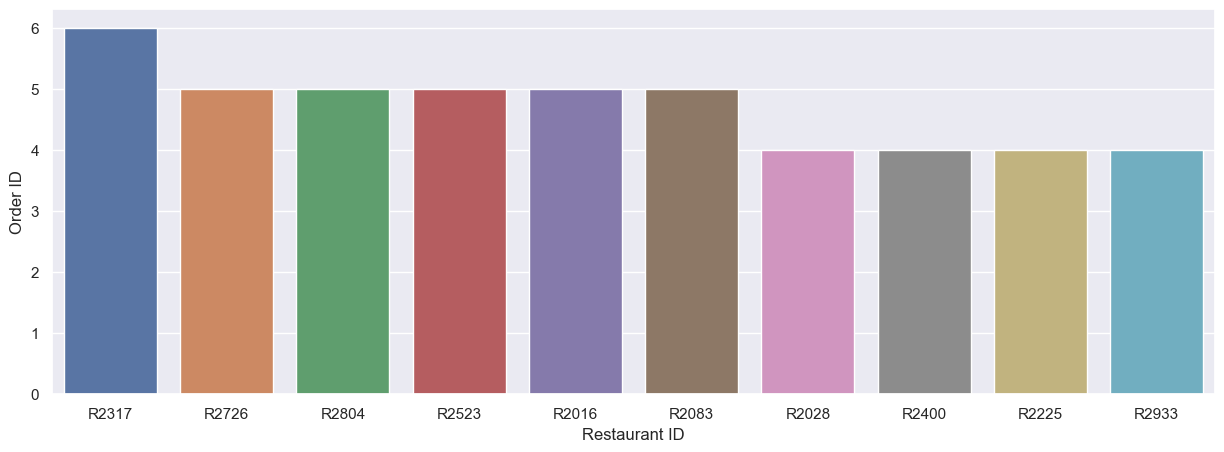

In [75]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
restaurant_sales = food_orders.groupby(['Restaurant ID'], as_index=False)['Order ID'].count().sort_values(by='Order ID', ascending=False).head(10)
sns.barplot(data = restaurant_sales, x = 'Restaurant ID',y= 'Order ID')

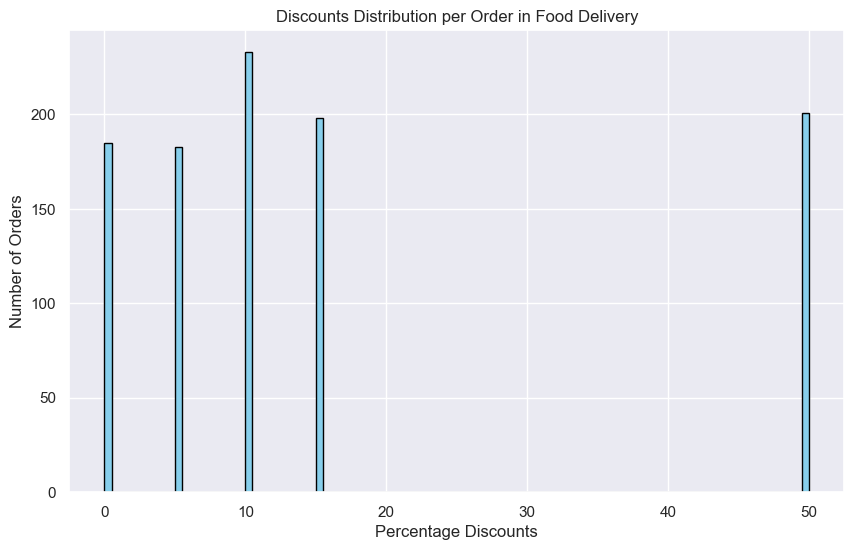

In [76]:

plt.figure(figsize=(10,6))
plt.hist(food_orders['Discounts and Offers']*100,bins=100,color='skyblue',edgecolor='black')
plt.title('Discounts Distribution per Order in Food Delivery')
plt.xlabel('Percentage Discounts')
plt.ylabel('Number of Orders')
plt.show()

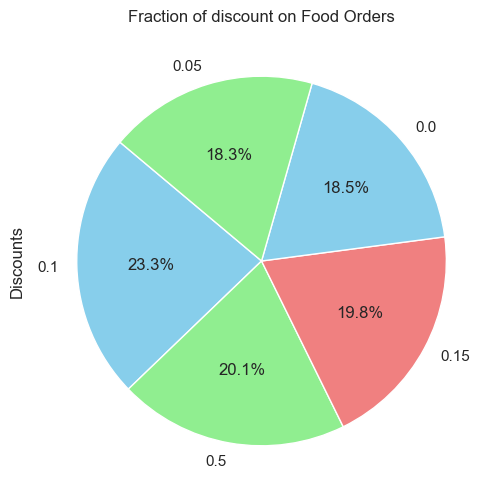

In [77]:


payment_counts = food_orders['Discounts and Offers'].value_counts()
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='pie',autopct="%0.1f%%",startangle=140,colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Fraction of discount on Food Orders')
plt.ylabel('Discounts')
plt.show()

In [78]:
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

food_orders['Delivery Time'] = food_orders['Delivery Date and Time'] - food_orders['Order Date and Time']
print(food_orders['Delivery Time'])


0     0 days 01:28:00
1     0 days 00:35:00
2     0 days 00:58:00
3     0 days 00:46:00
4     0 days 01:29:00
            ...      
995   0 days 00:42:00
996   0 days 01:20:00
997   0 days 01:01:00
998   0 days 01:44:00
999   0 days 00:53:00
Name: Delivery Time, Length: 1000, dtype: timedelta64[ns]


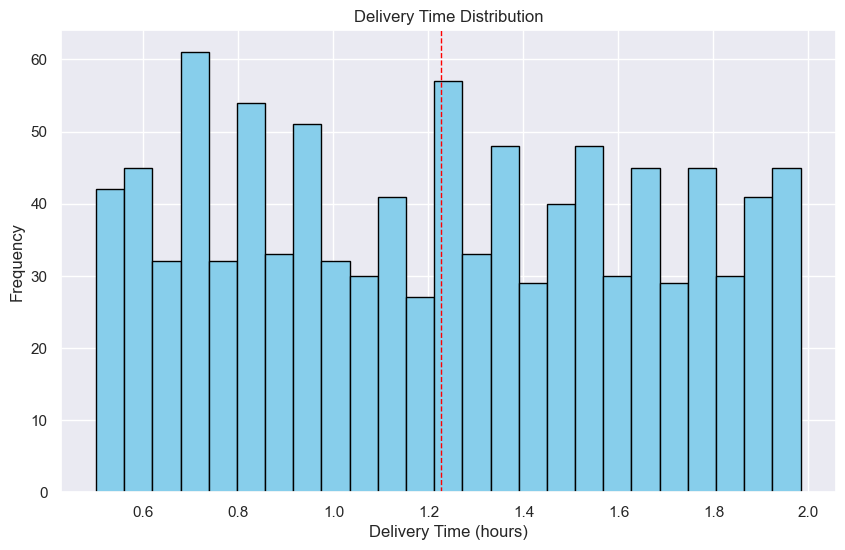

In [79]:
food_orders['Delivery Time'] = (food_orders['Delivery Date and Time'] - food_orders['Order Date and Time']).dt.total_seconds() / 3600

plt.figure(figsize=(10, 6))
plt.hist(food_orders['Delivery Time'], bins=25, color='skyblue', edgecolor='black')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.axvline(food_orders['Delivery Time'].mean(),color='red',linestyle='dashed',linewidth=1)
plt.grid(True)
plt.show()

In [80]:
profitable_orders = food_orders.loc[food_orders['Profit'] > 0].copy()

profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

New Average Commission Percentage: 30.51%

New Average Discount Percentage: 5.87%

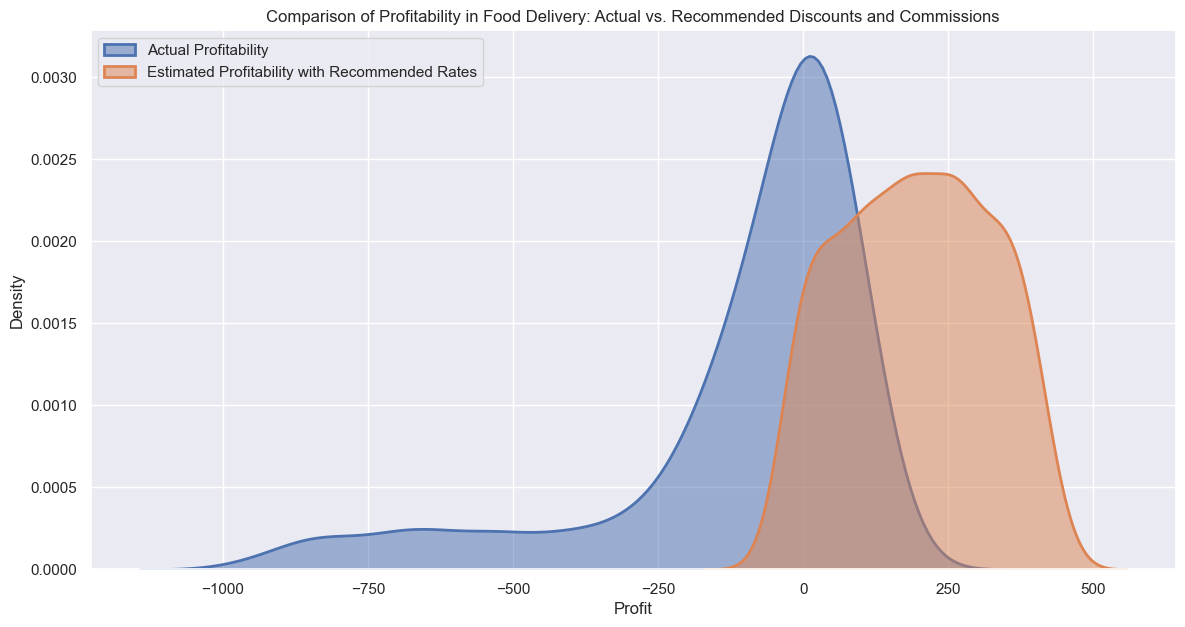

In [81]:
 #simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [82]:
print(food_orders['Simulated Commission Fee'].sum())
Percentage_Commission_Fee_increase=(food_orders['Simulated Commission Fee'].sum()-food_orders['Commission Fee'].sum())*100/food_orders['Simulated Commission Fee'].sum()
print(Percentage_Commission_Fee_increase)

316190.69999999995
59.837528428255474


In [83]:
print(food_orders['Simulated Profit'].sum())
Percentage_Profit_increase=(food_orders['Simulated Profit'].sum()-food_orders['Profit'].sum())*100/food_orders['Simulated Profit'].sum()
print(Percentage_Profit_increase)

194500.56
154.3545221669285


The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

Profitablility increases by 154%

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.